In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
scotus = pd.read_csv("/content/drive/My Drive/warsztaty/scotus.csv")
scotus = scotus.dropna(subset=['text'])

<ipython-input-19-d60f0b9ae19f>:1: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  scotus = pd.read_csv("/content/drive/My Drive/scotus.csv")


In [ ]:
scotus['year']=scotus['decision_date'].str.extract(r'(\d{4})').astype("int")

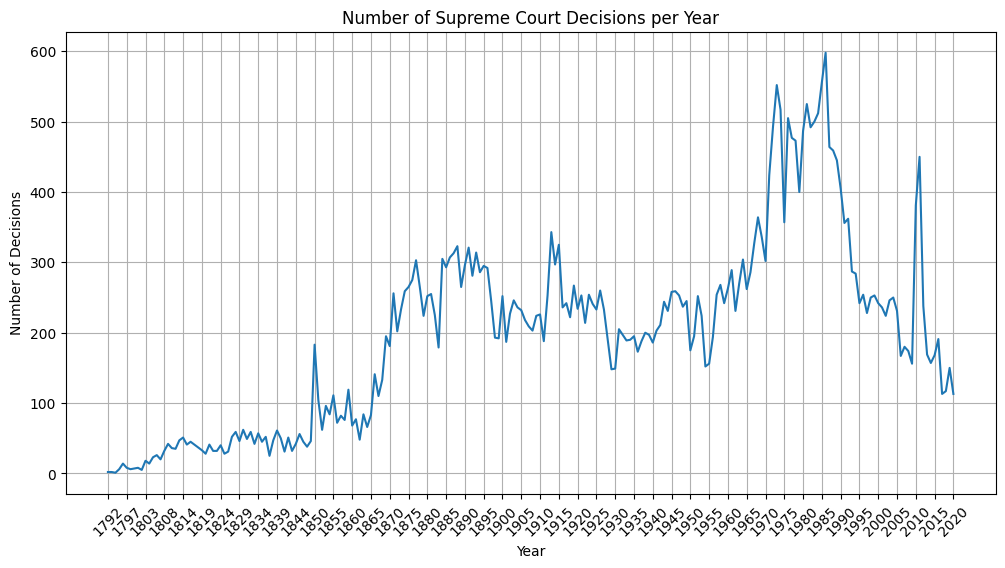

In [ ]:
import matplotlib.pyplot as plt

# Count the number of decisions per year
decisions_per_year = scotus['year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(decisions_per_year.index, decisions_per_year.values)
plt.xticks(rotation=45)

plt.title("Number of Supreme Court Decisions per Year")
plt.xlabel("Year")
plt.ylabel("Number of Decisions")
plt.grid(True)
plt.show()


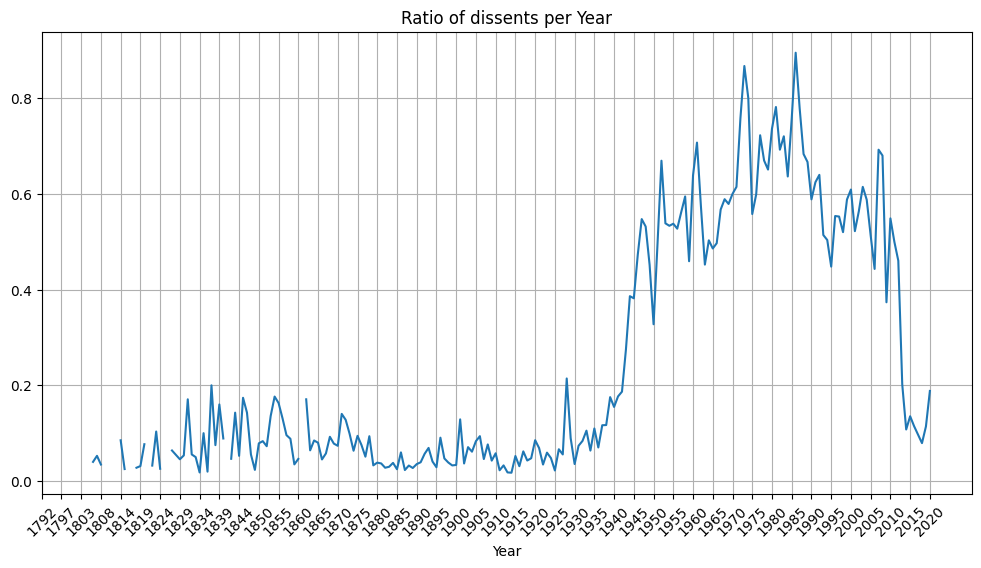

In [ ]:
import matplotlib.pyplot as plt

# Count the number of decisions per year
majority_per_year = scotus[scotus['type']=="majority"]['year'].value_counts().sort_index()
dissent_per_year = scotus[scotus['type']=="dissent"]['year'].value_counts().sort_index()
ratio=dissent_per_year/majority_per_year


# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(ratio.index, ratio.values)
plt.xticks(rotation=45)

plt.title("Ratio of dissents per Year")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [ ]:
!pip install gensim nltk

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from gensim.utils import simple_preprocess
import spacy


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
from tqdm import tqdm

chunk_size = 1000  # Adjust based on your memory capacity
data_lemmatized = []

for i in tqdm(range(0, len(scotus1900), chunk_size)):
    chunk = scotus1900['text'][i:i+chunk_size]
    data_words = list(sent_to_words(chunk))
    data_words_nostops = remove_stopwords(data_words)
    chunk_lemmatized = lemmatization(data_words_nostops)
    data_lemmatized.extend(chunk_lemmatized)

100%|██████████| 33/33 [1:16:23<00:00, 138.90s/it]


In [ ]:
import json
with open('/content/drive/My Drive/warsztaty/data_lem.json', 'w') as f:
    json.dump(data_lemmatized, f, indent=2)

In [ ]:
import json
with open("/content/drive/My Drive/warsztaty/data_lem.json", "r") as f:
    data_lemmatized = json.load(f)

In [ ]:
data_lemmatized=[" ".join(data) for data in data_lemmatized]

In [ ]:
!apt-get install -y openjdk-11-jdk
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip
!pip install little_mallet_wrapper

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-11-jdk is already the newest version (11.0.25+9-1ubuntu1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
--2024-12-09 08:34:02--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2024-12-09 08:34:03--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.2’

mallet-2.0.8.zip.2  100%[===================>]  15.43M  18.2MB/s    in 0.8s    

2024-12-09 08:34:04 (18.2 MB/s) - ‘mallet-2.

In [ ]:
import little_mallet_wrapper as lmw


output_directory_path = '/content/drive/warsztaty/My Drive/lmw-output'
path_to_mallet ="mallet-2.0.8"


# Path to the Mallet binary
path_to_mallet = "/content/mallet-2.0.8/bin/mallet"
topic_keys, topic_distributions = lmw.quick_train_topic_model(path_to_mallet,
                                                              output_directory_path,
                                                              num_topics = 20, #change accordingly
                                                             data_lemmatized)

In [ ]:
# load topic keys distributions for k=20
topic_word_distributions_20=lmw.load_topic_word_distributions("/content/drive/My Drive/warsztaty/lmw-output/mallet.word_weights.20")
topic_distributions_20=lmw.load_topic_distributions("/content/drive/My Drive/warsztaty/lmw-output/mallet.topic_distributions.20")
topic_keys_20=lmw.load_topic_keys("/content/drive/My Drive/warsztaty/lmw-output/mallet.topic_keys.20")

#same for k=10
topic_word_distributions_10=lmw.load_topic_word_distributions("/content/drive/My Drive/warsztaty/lmw-output/mallet.word_weights.10")
topic_distributions_10=lmw.load_topic_distributions("/content/drive/My Drive/warsztaty/lmw-output/mallet.topic_distributions.10")
topic_keys_10=lmw.load_topic_keys("/content/drive/My Drive/lmw-output/mallet.topic_keys.10")



In [ ]:
for i, t in enumerate(topic_keys_20):
    print(i, '\t', ' '.join(t[:10]))

0 	 employee union board labor employer agreement act work employment contract
1 	 tax income property pay year amount taxis value revenue payment
2 	 land water states united indian tribe right state river act
3 	 district election state vote court school discrimination race county plan
4 	 price patent use sale market sell product trade business competition
5 	 commission rate commerce interstate carrier railroad company order service transportation
6 	 united states government congress power act president law foreign alien
7 	 act congress see provision federal statute regulation agency provide section
8 	 sentence death state court sentencing penalty jury defendant punishment prison
9 	 trial jury court evidence defendant petitioner counsel case witness state
10 	 united states criminal statute offense act crime government charge person
11 	 state law court federal right statute power constitution amendment case
12 	 bank bankruptcy property interest plan insurance trust claim cred

In [ ]:
#label topics
topic_labels = {
    0: '',
    1: '',
    2: '',
    3: '',
    4: '',
    5: '',
    6: '',
    7: '',
    8: '',
    9: '',
    10: '',
    11: '',
    12: '',
    13: '',
    14: '',
    15: '',
    16: '',
    17: '',
    18: '',
    19: ''}



# Create a DataFrame from the topic distributions
topic_df = pd.DataFrame(topic_distributions, columns= topic_labels.values())
topic_df.index = topic_keys

# Concatenate the topic probabilities with the scotus1900 DataFrame
scotus1900 = pd.concat([scotus1900, topic_df], axis=1)

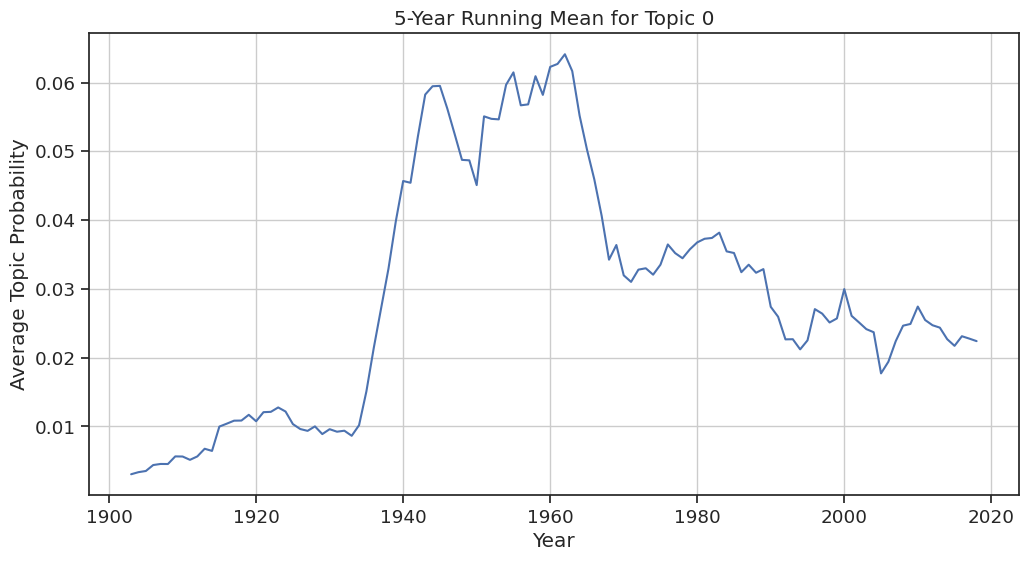

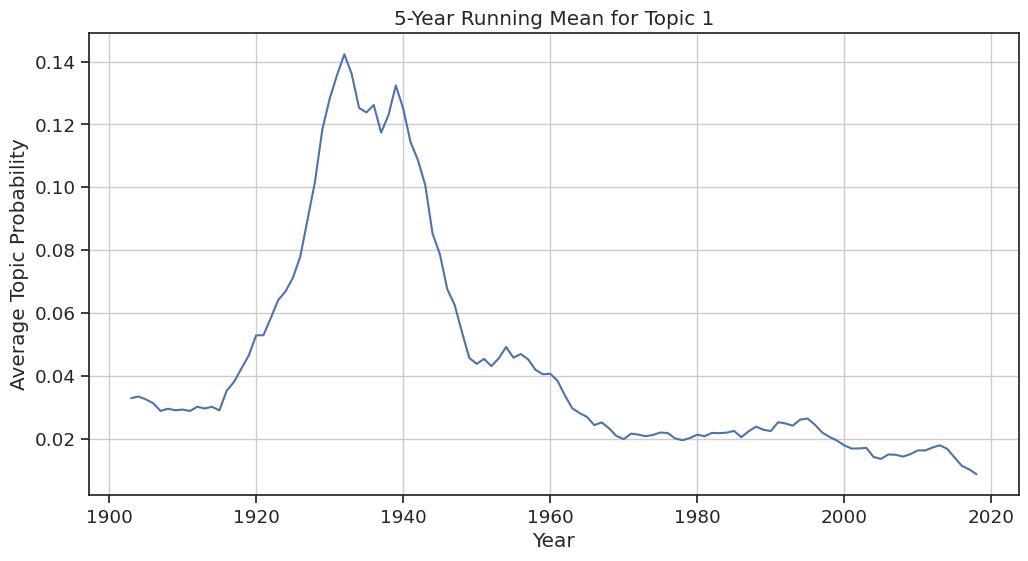

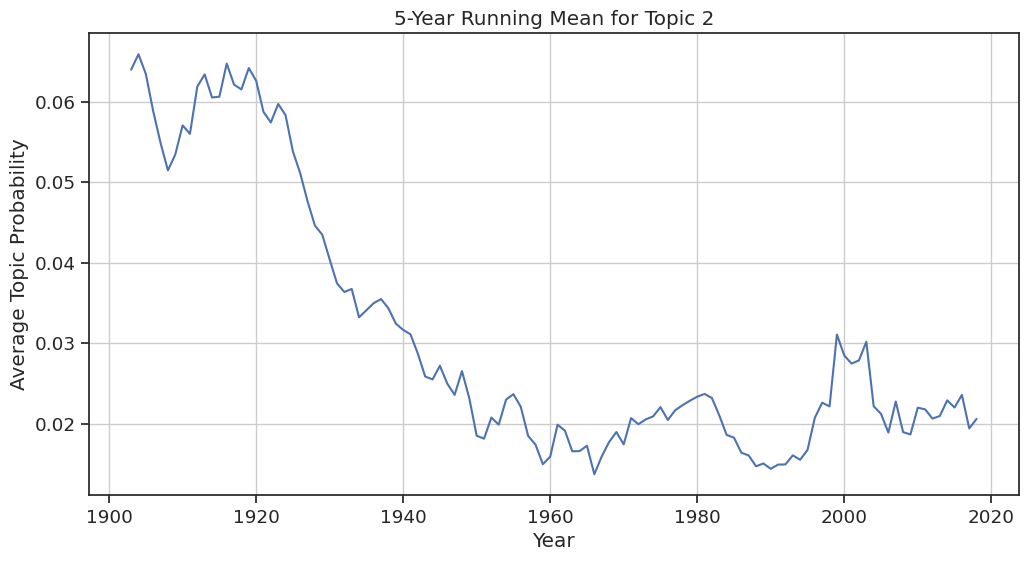

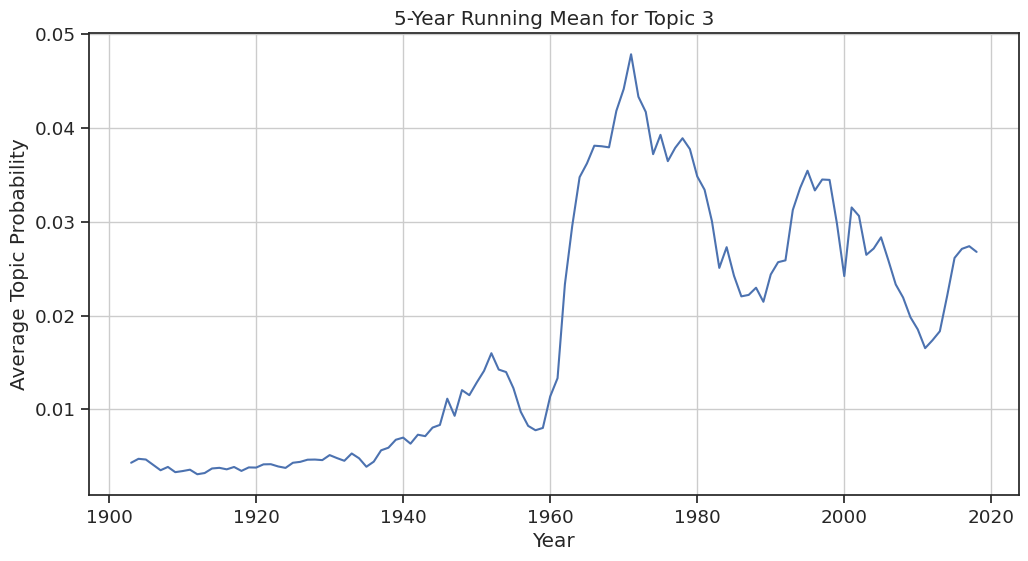

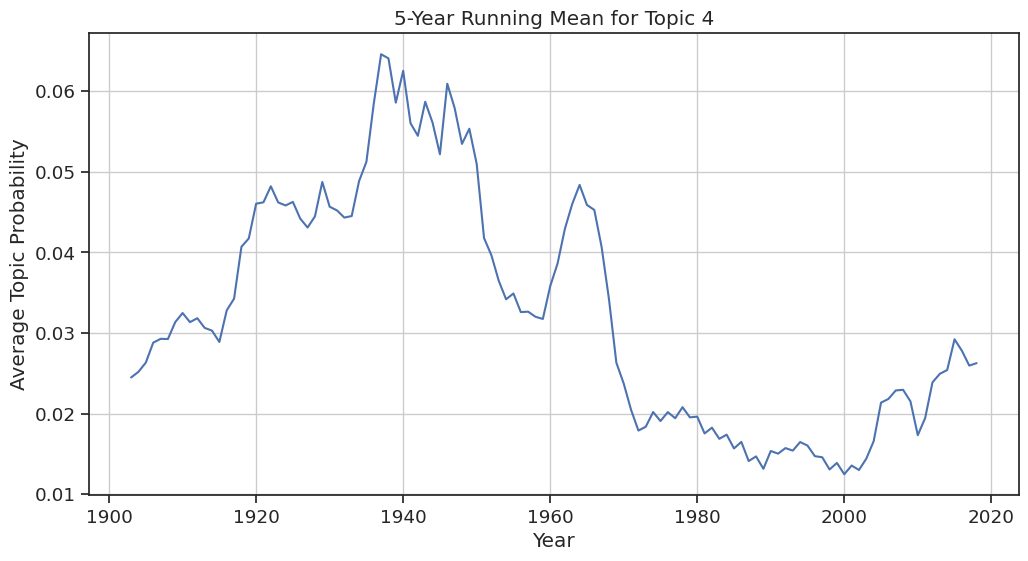

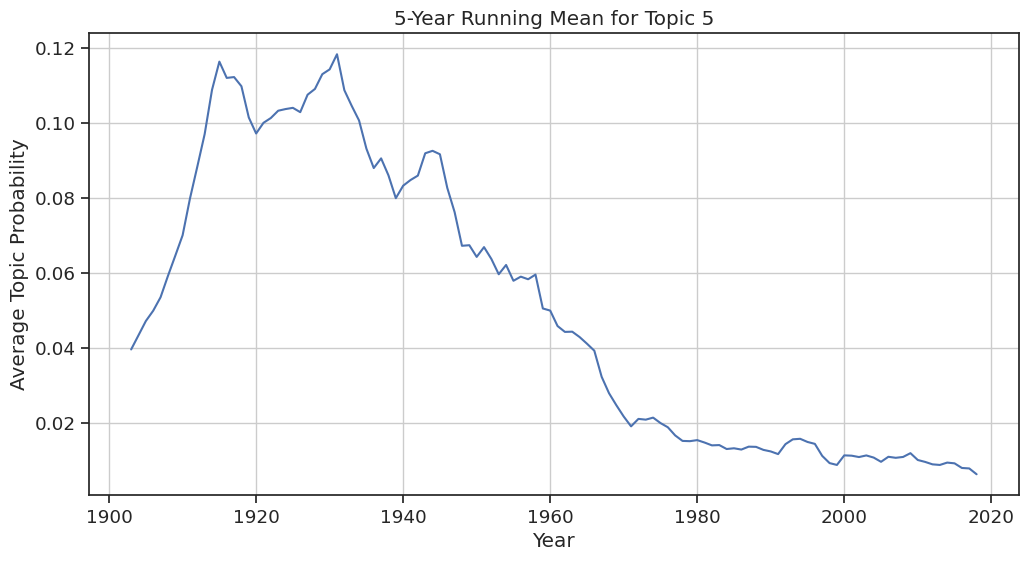

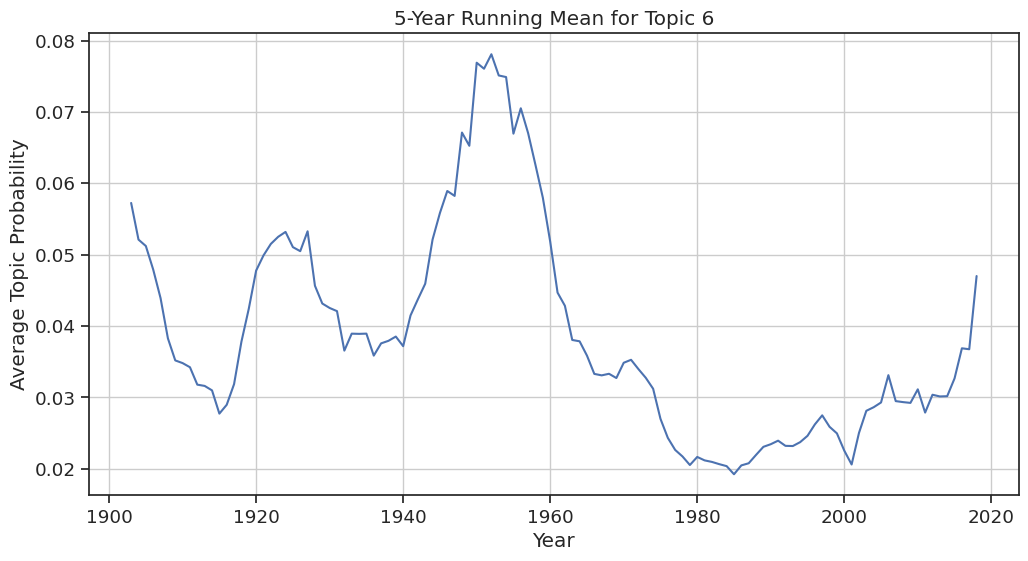

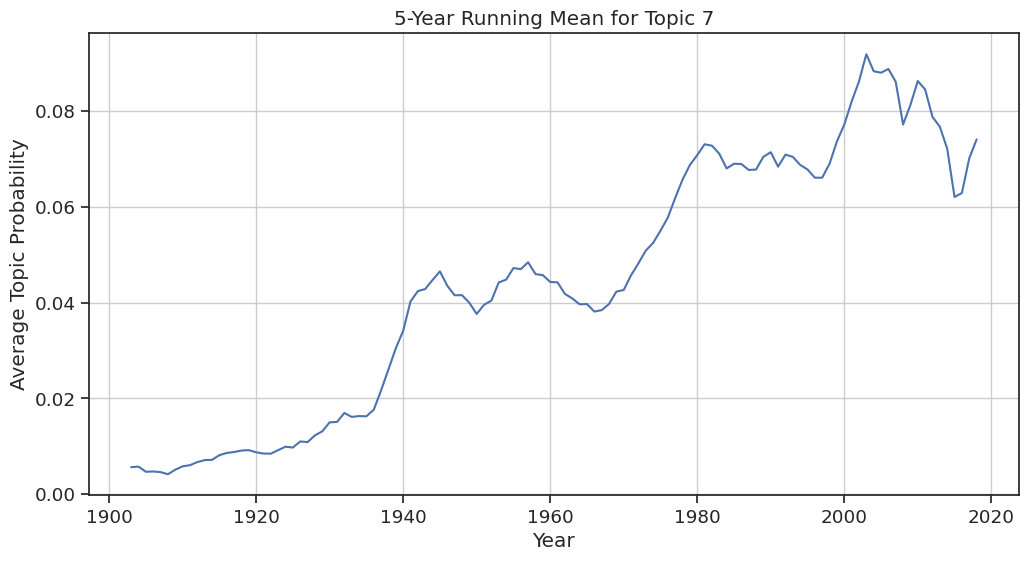

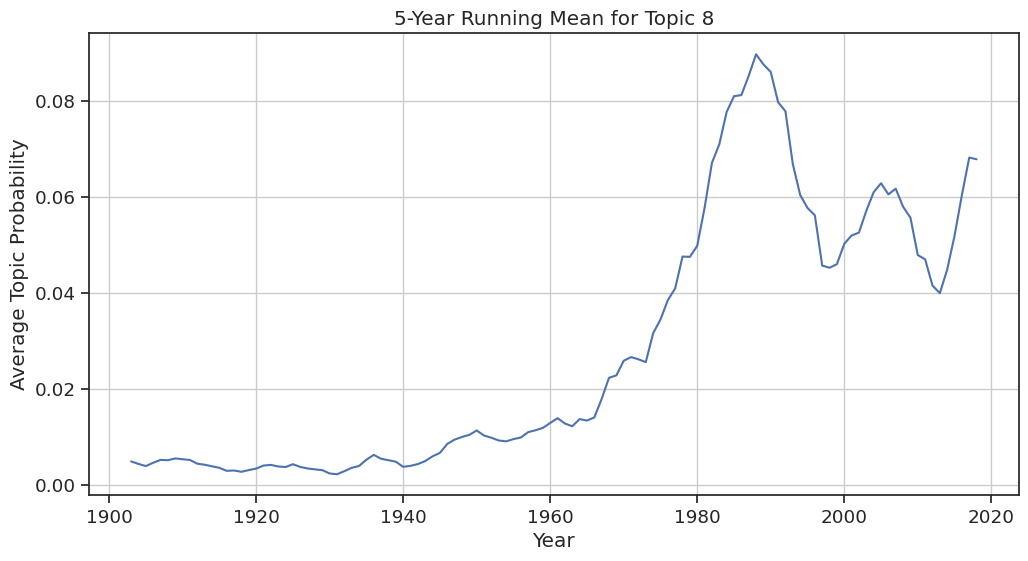

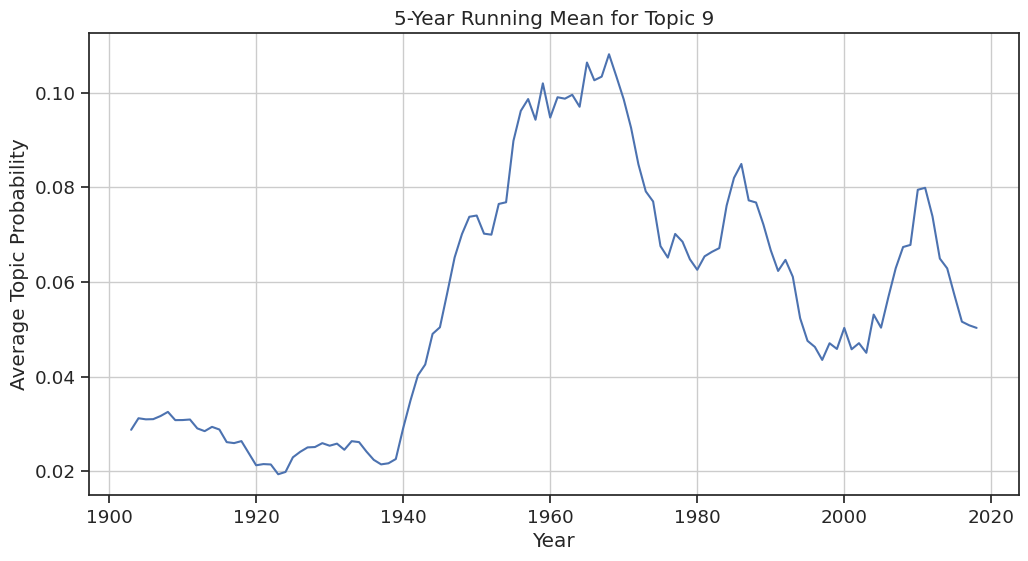

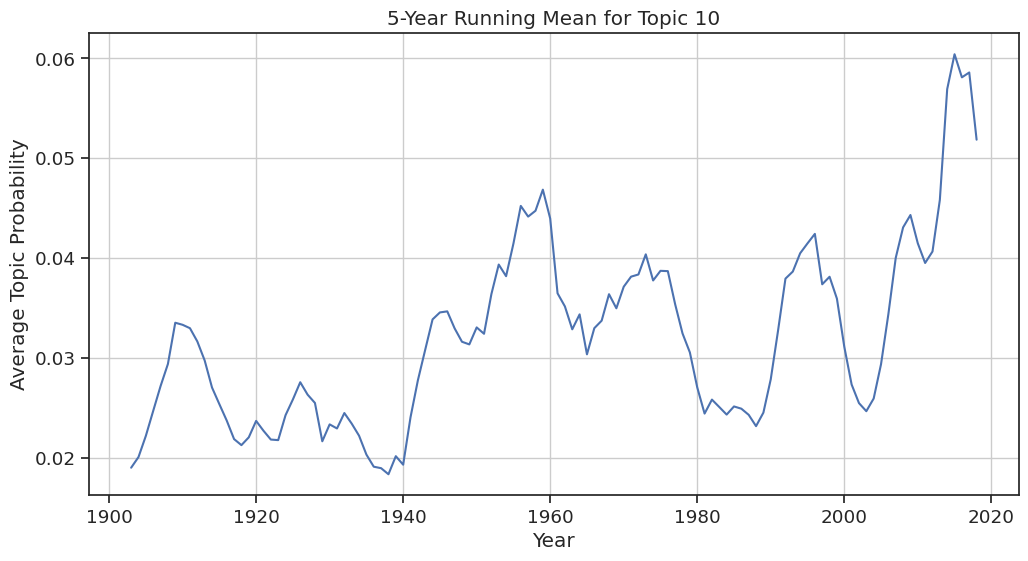

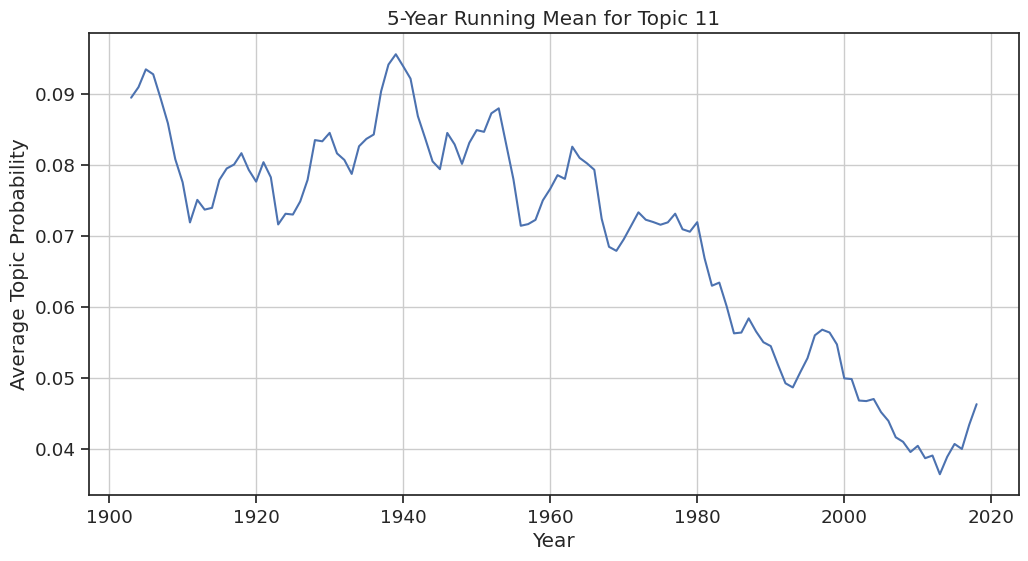

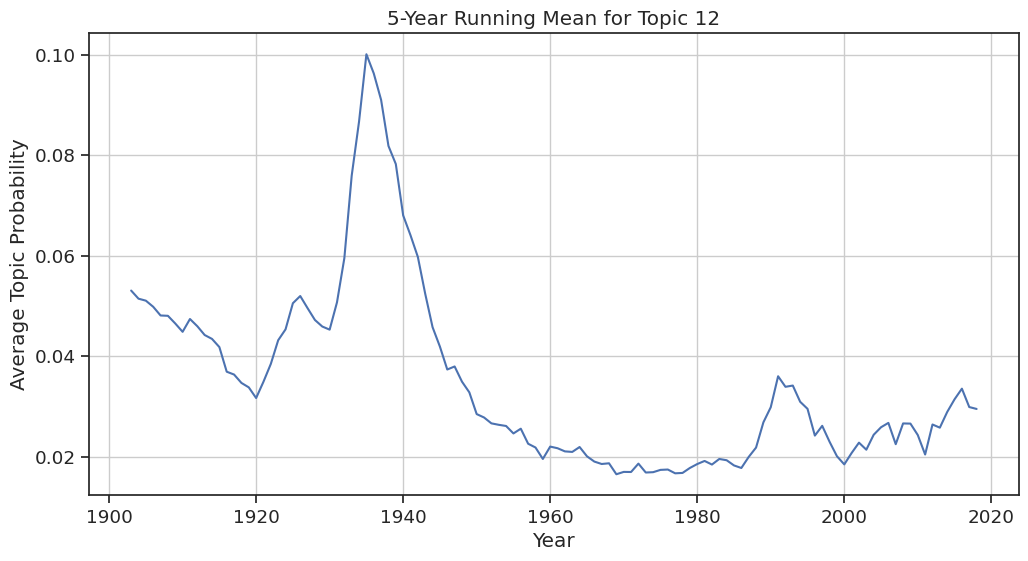

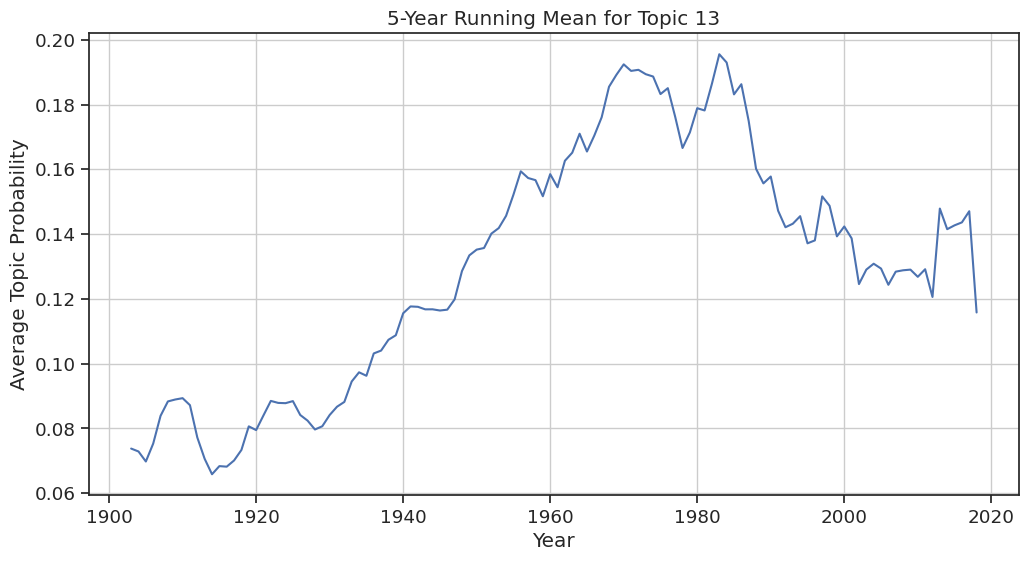

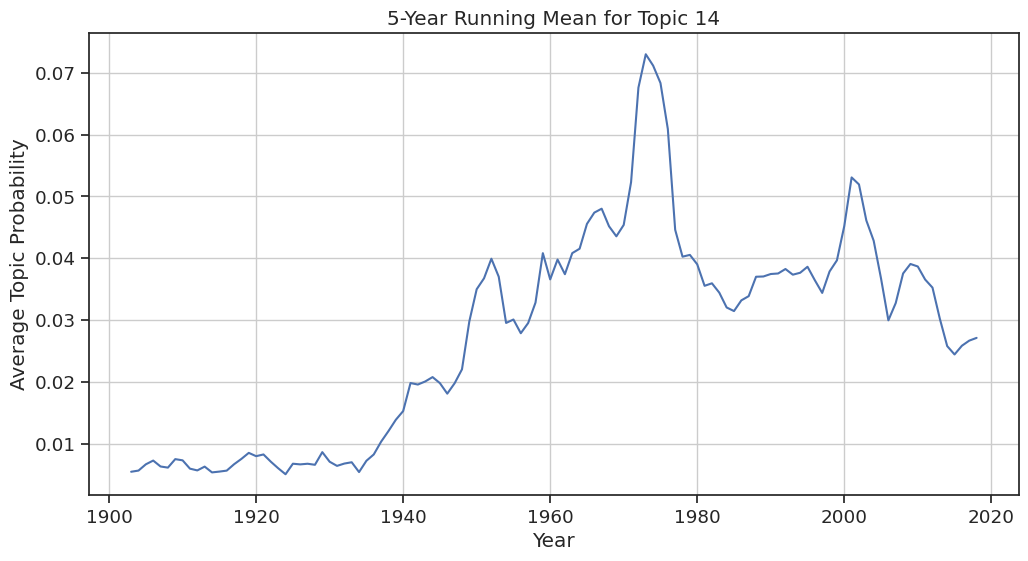

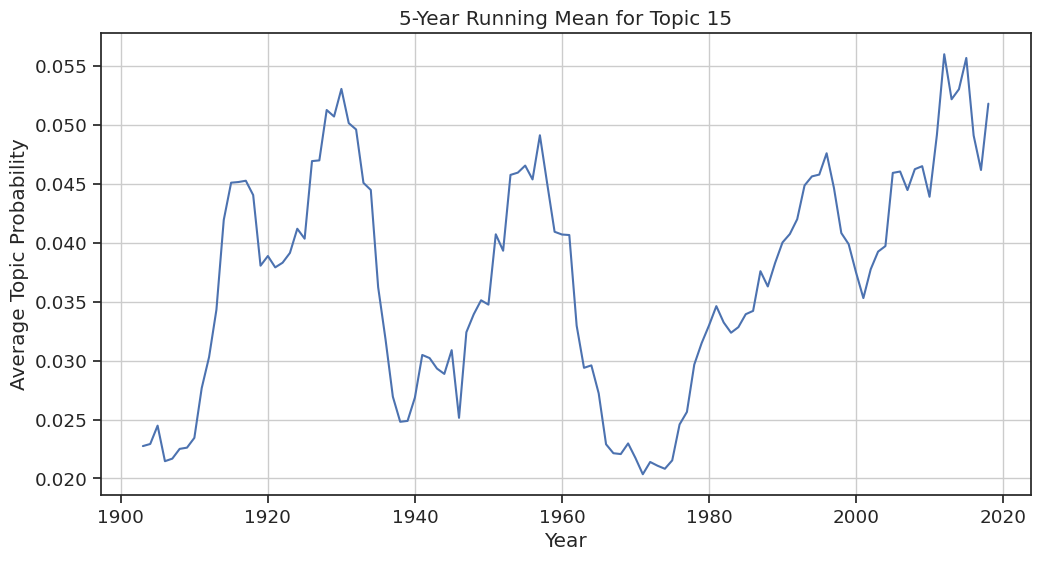

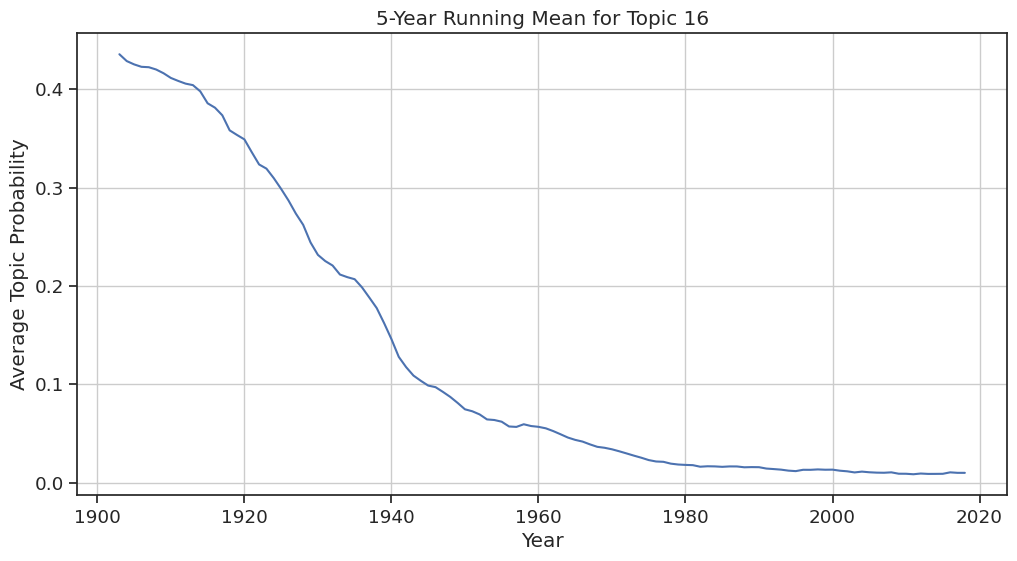

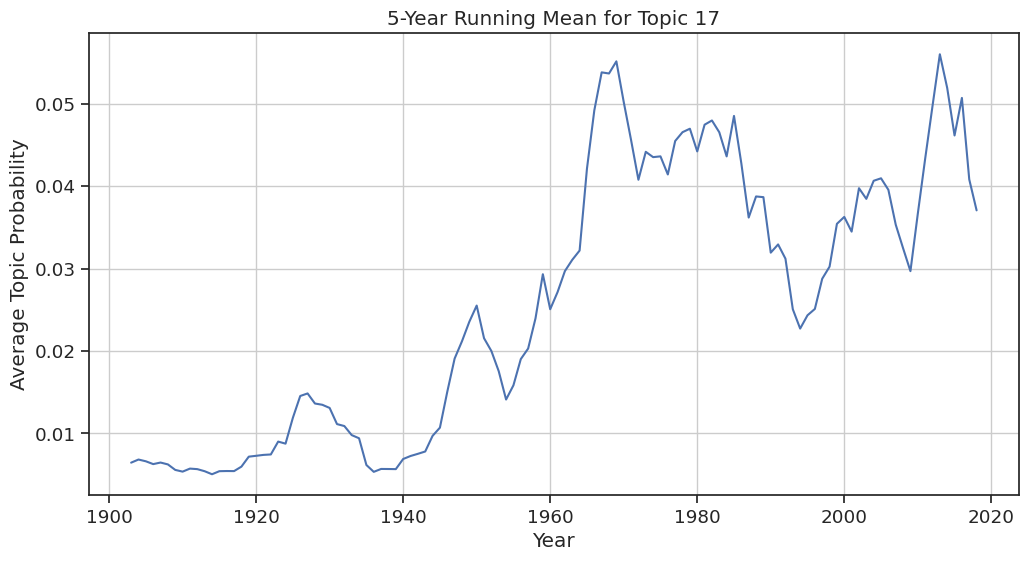

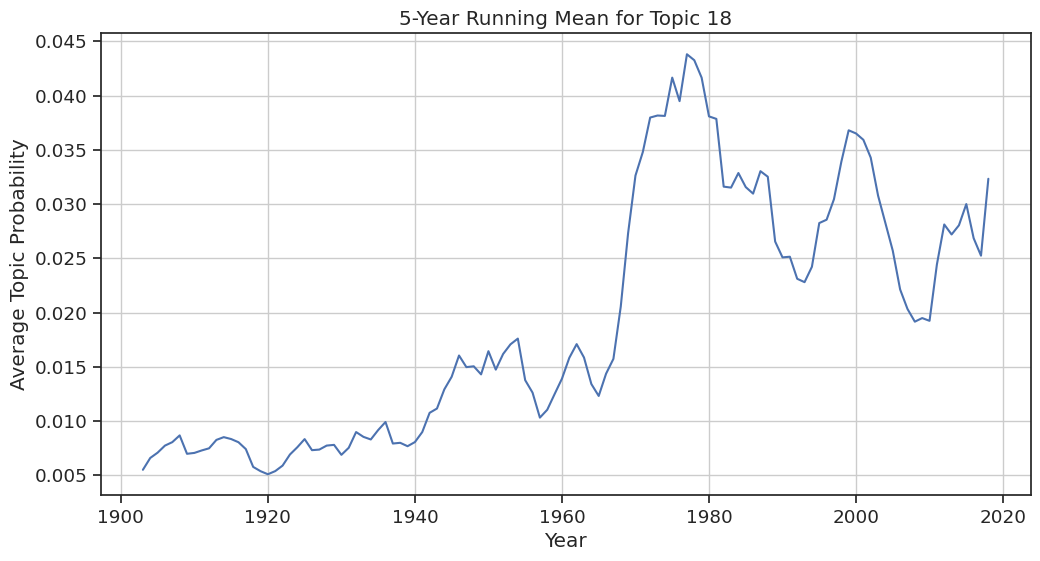

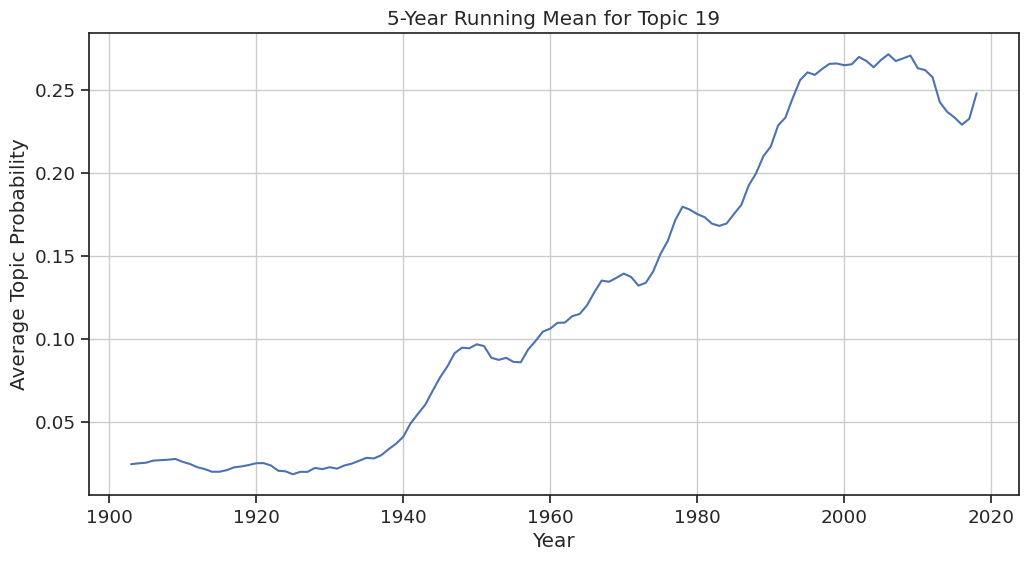

In [ ]:
# prompt: now, plot the 5-year running mean for each topic in a separate panel, Use variable 'year' from scotus1900

import matplotlib.pyplot as plt



# Calculate the 5-year running mean for each topic
num_topics = 20  # Replace with the actual number of topics if different
window_size = 5

for i in range(num_topics):
    topic_column = f'topic_{i}'
    if topic_column in scotus1900.columns: #check if topic exists
      running_mean = scotus1900.groupby('year')[topic_column].mean().rolling(window=window_size, center=True).mean()
      plt.figure(figsize=(12, 6))
      plt.plot(running_mean.index, running_mean.values)
      plt.title(f'5-Year Running Mean for Topic {i}')
      plt.xlabel('Year')
      plt.ylabel('Average Topic Probability')
      plt.grid(True)
      plt.show()